In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
from sklearn.metrics import (adjusted_mutual_info_score, adjusted_rand_score,
                             classification_report, mean_squared_error)
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection
from transform_data import get_train_test_ds

random_state = 42
range_n_clusters = range(2, 61)
dataset_name = 'bank'
dataset_dir = 'data/bank.csv'

In [2]:
X, X_train, X_test, y, y_train, y_test = get_train_test_ds(dataset_name, dataset_dir, random_state)
X_train.shape, X_test.shape

((140022, 24), (35006, 24))

# PCA

In [3]:
pca = PCA(random_state=random_state)
pipe = Pipeline([
  ('scaler', StandardScaler()), 
  ('pca', pca),
])
transform_X = pipe.fit_transform(X)

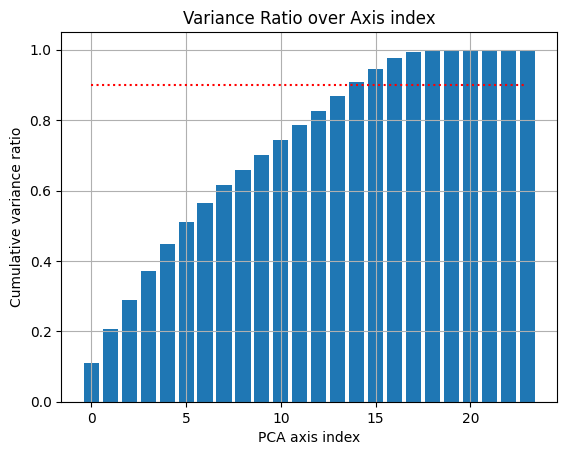

In [4]:
cum_sum_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plot_x = np.arange(len(cum_sum_variance_ratio))

plt.bar(plot_x, cum_sum_variance_ratio)
plt.hlines(y=0.9, xmin=plot_x.min(), xmax=plot_x.max(), color='red', linestyle='dotted')
plt.xlabel('PCA axis index')
plt.ylabel('Cumulative variance ratio')
plt.title('Variance Ratio over Axis index')
plt.grid()
plt.show()

# ICA

In [5]:
ica = FastICA(max_iter=500, random_state=random_state)

In [6]:
plot_kurtosis = []

for i in range(1, len(X.columns)+1):
  ica.set_params(n_components=i)
  pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('ica', ica),
  ])
  transform_X = pipe.fit_transform(X)
  avg_kurtosis = pd.DataFrame(transform_X).kurt(axis=0).abs().mean()
  plot_kurtosis.append(avg_kurtosis)

/home/jack/data/omscs/7641 - ml/venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/jack/data/omscs/7641 - ml/venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/jack/data/omscs/7641 - ml/venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


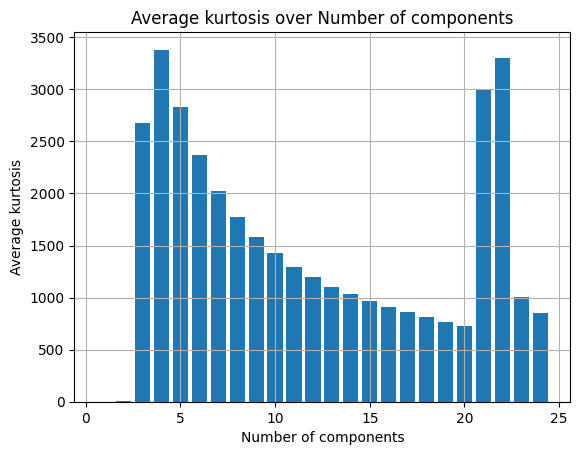

In [7]:
plot_x = range(1, len(X.columns)+1)

plt.bar(plot_x, plot_kurtosis)
plt.xlabel('Number of components')
plt.ylabel('Average kurtosis')
plt.title('Average kurtosis over Number of components')
plt.grid()
plt.show()

# Random projection

In [8]:
rca = GaussianRandomProjection(random_state=random_state)

In [9]:
plot_reconstruction_error = []

for i in range(1, len(X.columns)+1):
  rca.set_params(n_components=i)
  pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('rca', rca),
  ])
  transform_X = pipe.fit_transform(X)
  reconstruct_X = rca.inverse_transform(transform_X)
  reconstruction_error = mean_squared_error(X, reconstruct_X)

  plot_reconstruction_error.append(reconstruction_error)

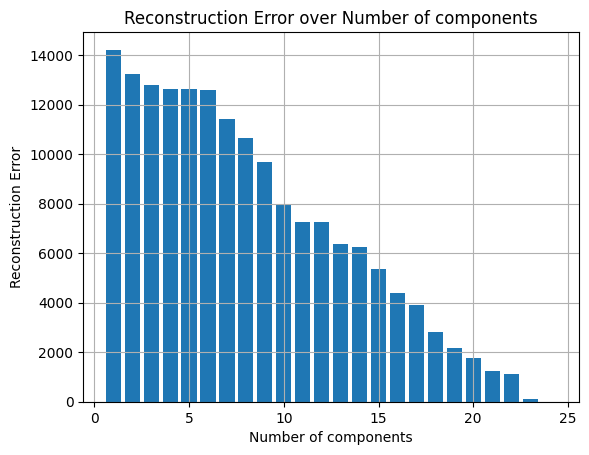

In [10]:
plot_reconstruction_error = plot_reconstruction_error - np.min(plot_reconstruction_error)
plot_x = range(1, len(X.columns)+1)

plt.bar(plot_x, plot_reconstruction_error)
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error over Number of components')
plt.grid()
plt.show()

# t-SNE

In [11]:
tsne = TSNE(n_components=3, n_jobs=-1, random_state=random_state)

In [12]:
plot_kl_divergence = []

for i in [1, 2, 3]:
  tsne.set_params(n_components=i)
  pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('tsne', tsne),
  ])
  transform_X = pipe.fit_transform(X)
  kl_divergence = tsne.kl_divergence_

  plot_kl_divergence.append(kl_divergence)

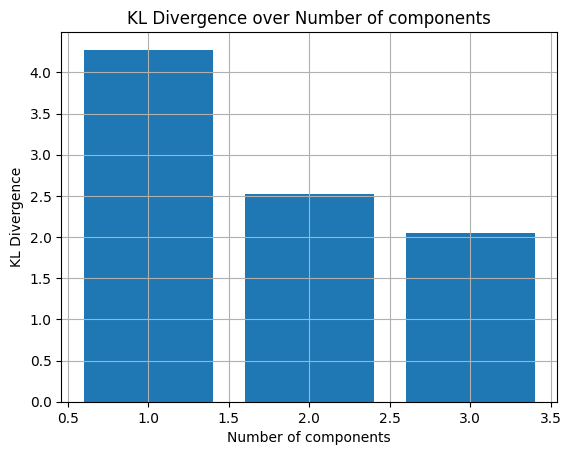

In [13]:
plot_x = [1, 2, 3]

plt.bar(plot_x, plot_kl_divergence)
plt.xlabel('Number of components')
plt.ylabel('KL Divergence')
plt.title('KL Divergence over Number of components')
plt.grid()
plt.show()